## Initialization

### Imports

In [1]:
import os

import pandas as pd
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

### Auxiliary variables

In [2]:
# [lon_min, lon_max, lat_min, lat_max]
locations = {"Greece": [19.37, 29.57, 34.8, 41.7],
             "Attica": [23.4, 24.3, 37.6, 38.3],}

### Read data with xarray

In [3]:
filename = "download.grib"
home_dir = os.path.expanduser('~')
file_path = os.path.join(home_dir, 'Code/star-struck/data/', filename)

ds = xr.open_dataset(file_path, engine='cfgrib')

# Convert temperature to Celcius
ds['t2m'] -= 273.15

ds['t2m'].attrs["units"] = "deg C"

In [7]:
ds

<xarray.Dataset>
Dimensions:     (time: 32, step: 24, latitude: 70, longitude: 103)
Coordinates:
    number      int64 ...
  * time        (time) datetime64[ns] 2022-06-30 2022-07-01 ... 2022-07-31
  * step        (step) timedelta64[ns] 01:00:00 02:00:00 ... 1 days 00:00:00
    surface     float64 ...
  * latitude    (latitude) float64 41.7 41.6 41.5 41.4 ... 35.1 35.0 34.9 34.8
  * longitude   (longitude) float64 19.37 19.47 19.57 ... 29.37 29.47 29.57
    valid_time  (time, step) datetime64[ns] ...
Data variables:
    t2m         (time, step, latitude, longitude) float32 nan nan ... nan nan
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-09-03T20:09 GRIB to CDM+CF via cfgrib-0.9.1...

## Mean temperature

### Group by and reduce by mean step

In [9]:
temperature_arr = ds["t2m"]
mean_daily_temperature = temperature_arr.groupby("time").mean("step")

### Reduce by mean time

In [11]:
mean_temperature = mean_daily_temperature.mean(dim="time")

### Plot a map

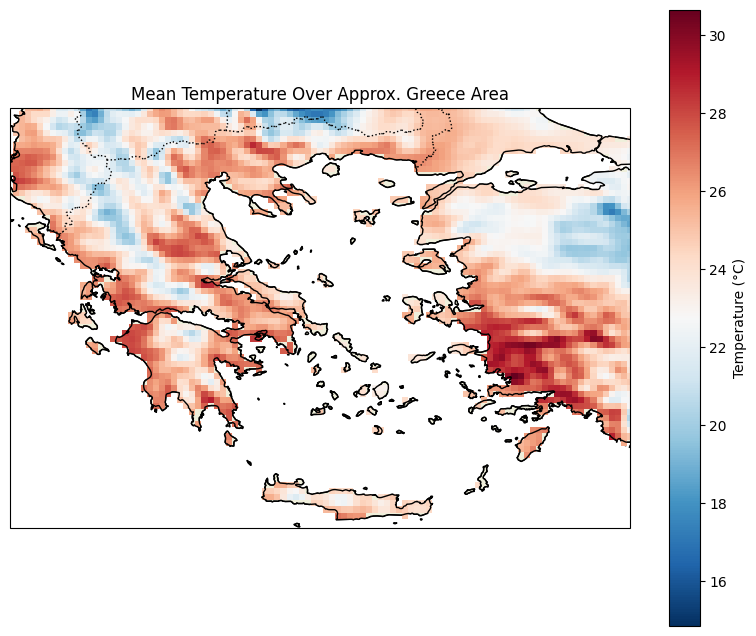

In [52]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10, 8))
ax.set_extent(locations["Greece"])
                            
# Plot the mean temperature data
mean_temperature.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='RdBu_r', cbar_kwargs={'label': 'Temperature (°C)'})

# Adding coastlines and land features for better visualization
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_title('Mean Temperature Over Approx. Greece Area')

plt.show()

## Min Temperature

### Group by and reduce by step minimum

In [53]:
temperature_arr = ds["t2m"]
min_daily_temperature = temperature_arr.groupby("time").min("step")

### Reduce by minimum time

In [54]:
min_temperature = min_daily_temperature.min(dim="time")

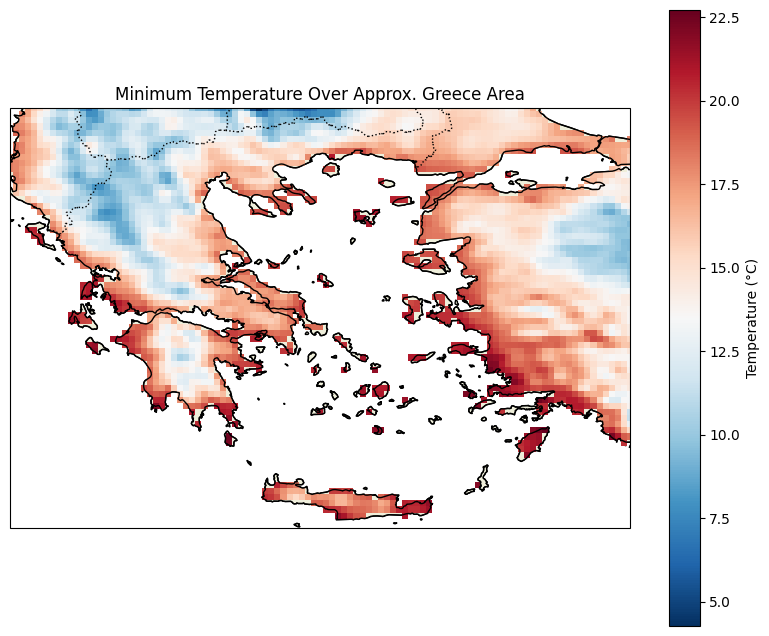

In [55]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10, 8))
ax.set_extent([19.37, 29.57, 34.8, 41.7])  # [lon_min, lon_max, lat_min, lat_max] covering approx. Greece area

# Plot the mean temperature data
min_temperature.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='RdBu_r', cbar_kwargs={'label': 'Temperature (°C)'})

# Adding coastlines and land features for better visualization
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_title('Minimum Temperature Over Approx. Greece Area')

plt.show()

## Max Temperature

### Group by and reduce by max step

In [56]:
temperature_arr = ds["t2m"]
max_daily_temperature = temperature_arr.groupby("time").max("step")

### Reduce by max time

In [57]:
max_temperature = max_daily_temperature.max(dim="time")

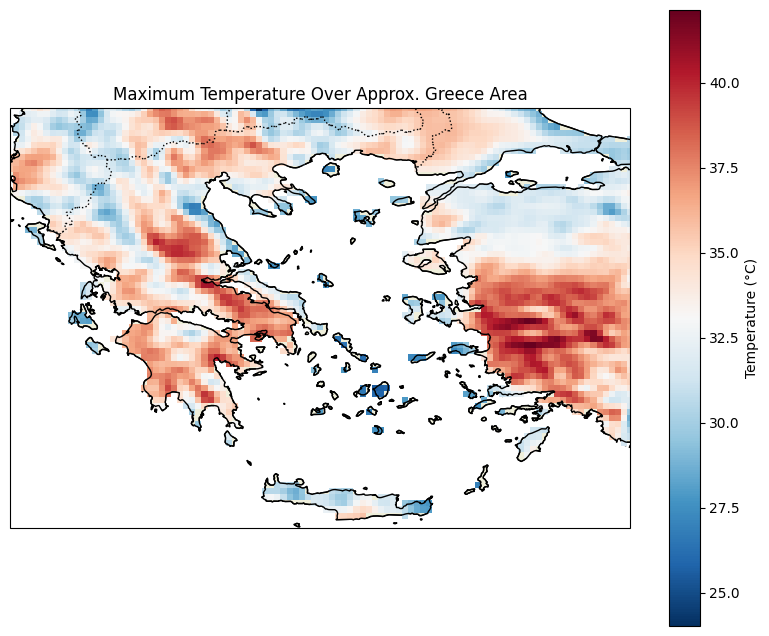

In [58]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10, 8))
ax.set_extent([19.37, 29.57, 34.8, 41.7])  # [lon_min, lon_max, lat_min, lat_max] covering approx. Greece area

# Plot the mean temperature data
max_temperature.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='RdBu_r', cbar_kwargs={'label': 'Temperature (°C)'})

# Adding coastlines and land features for better visualization
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_title('Maximum Temperature Over Approx. Greece Area')

plt.show()

## Plot everything in one figure

Using the data arrays created above.

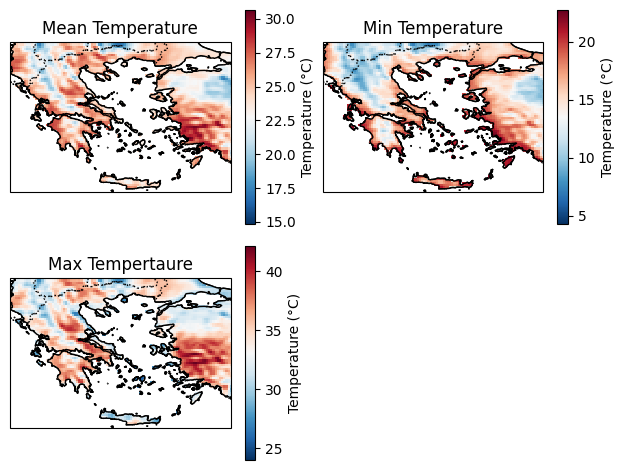

In [59]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, subplot_kw={'projection': ccrs.PlateCarree()})
ax4.axis('off')  # Turn off the 4th axis since you mentioned you only want 3 plots

def plot_temperature_on_ax(ax, data, title, location_extent):    
    """Plot data to ax with title as ax title."""
    ax.set_extent(location_extent)  # loation = lon_min, lon_max, lat_min, lat_max] covering approx. Greece area

    # Plot the mean temperature data
    data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='RdBu_r', cbar_kwargs={'label': 'Temperature (°C)'})

    # Adding coastlines and land features for better visualization
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.set_title(title)

# Define location_extent for Athens
location_extent = [19.37, 29.57, 34.8, 41.7]
    
# Now plot the data on the axes
plot_temperature_on_ax(ax1, mean_temperature, 'Mean Temperature', locations["Greece"])
plot_temperature_on_ax(ax2, min_temperature, 'Min Temperature', locations["Greece"])
plot_temperature_on_ax(ax3, max_temperature, 'Max Tempertaure', locations["Greece"])

plt.tight_layout()
plt.show()

## Attica specific data (monthly)

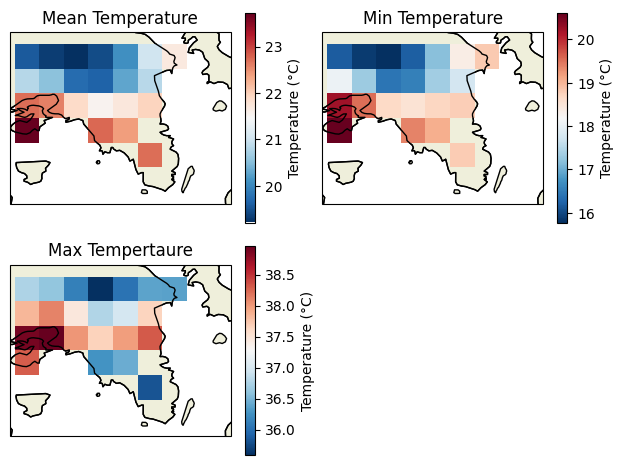

In [64]:
# selecting attica region
temperature_data = ds["t2m"]

attica = {'latitude': (38.23, 37.70),
          'longitude': (23.45, 24.25)}

attica_temperature_data = temperature_data.sel(latitude=slice(*attica['latitude']) , longitude=slice(*attica['longitude']))

# Getting mean monthly attica temperature
attica_mean_daily_temperature = attica_temperature_data.groupby("time").min("step")
attica_mean_monthly_temperature = attica_mean_daily_temperature.mean(dim="time")

# Getting min monthly attica temperature
attica_min_daily_temperature = attica_temperature_data.groupby("time").min("step")
attica_min_monthly_temperature = attica_min_daily_temperature.min(dim="time")

# Getting max monthly attica temperature
attica_max_daily_temperature = attica_temperature_data.groupby("time").max("step")
attica_max_monthly_temperature = attica_max_daily_temperature.max(dim="time")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, subplot_kw={'projection': ccrs.PlateCarree()})
ax4.axis('off')  # Turn off the 4th axis

# Now plot the data on the axes
plot_temperature_on_ax(ax1, attica_mean_monthly_temperature, 'Mean Temperature', locations["Attica"])
plot_temperature_on_ax(ax2, attica_min_monthly_temperature, 'Min Temperature', locations["Attica"])
plot_temperature_on_ax(ax3, attica_max_monthly_temperature, 'Max Tempertaure', locations["Attica"])

plt.tight_layout()
plt.show()